In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv(r"D:\Data science\Projects\Employee-Attrition\Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

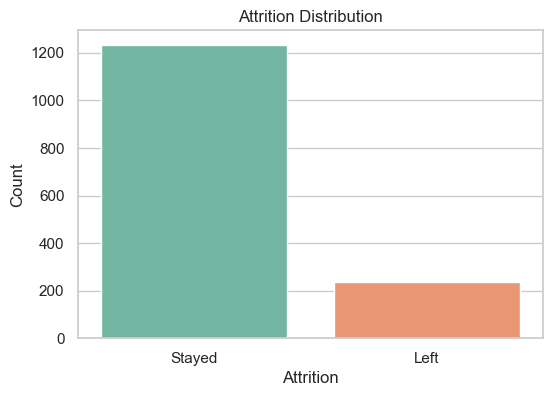

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Attrition Distribution")
plt.xticks([0,1], ['Stayed', 'Left'])
plt.ylabel("Count")
plt.show()

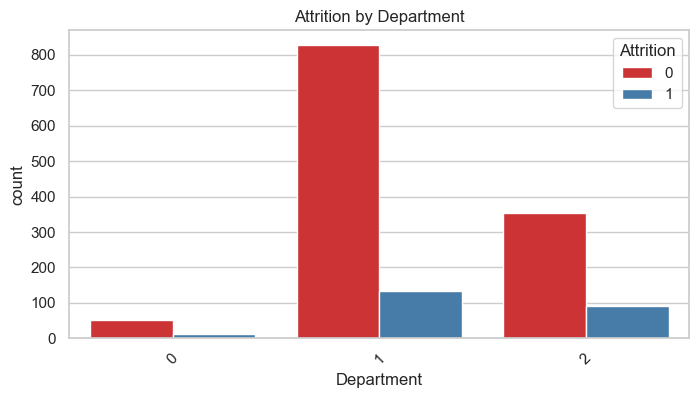

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

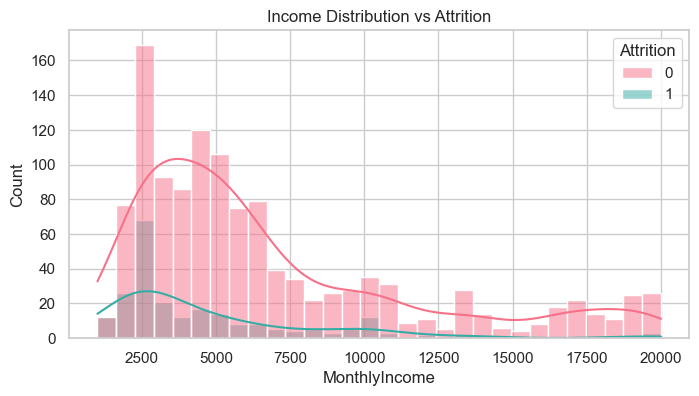

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, bins=30, palette='husl')
plt.title("Income Distribution vs Attrition")
plt.show()

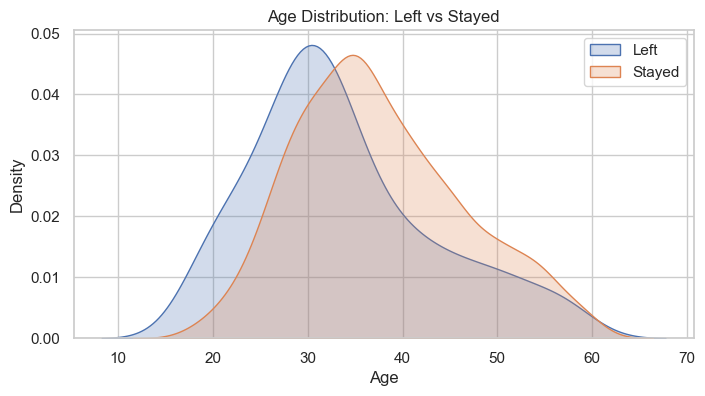

In [8]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df.Attrition==1]["Age"], label="Left", fill=True)
sns.kdeplot(df[df.Attrition==0]["Age"], label="Stayed", fill=True)
plt.title("Age Distribution: Left vs Stayed")
plt.legend()
plt.show()

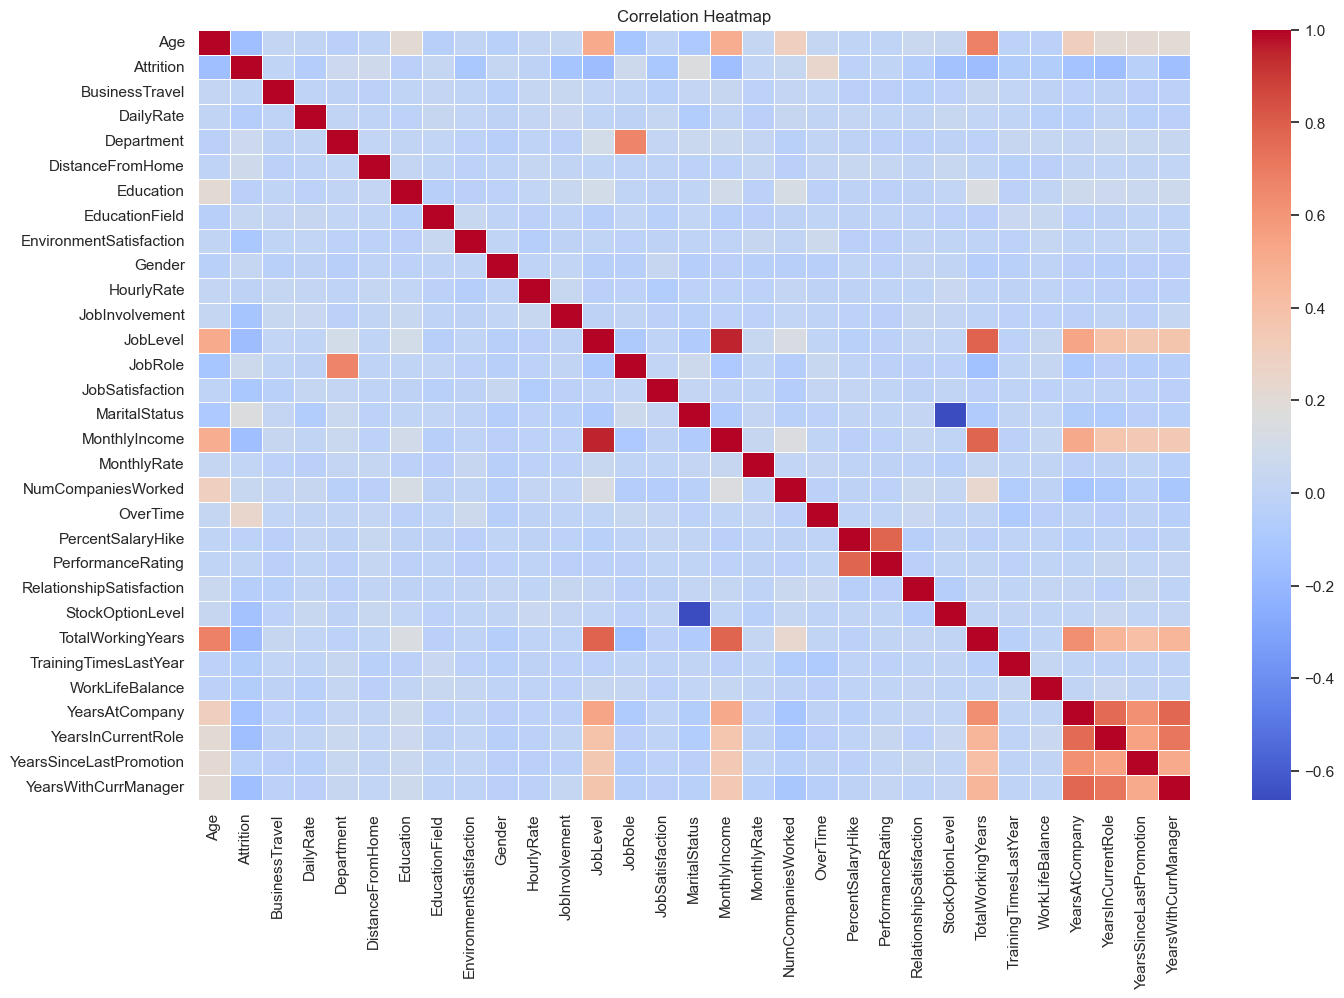

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5, annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🎯 Accuracy: 0.8809523809523809

📊 Confusion Matrix:
 [[254   1]
 [ 34   5]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



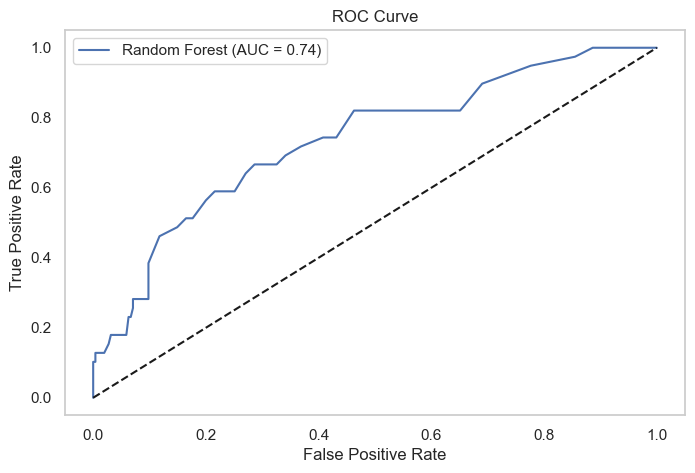

In [14]:
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [16]:
import joblib

joblib.dump(model, r'D:\Data science\Projects\Employee-Attrition\random_forest_model.pkl')
joblib.dump(scaler, r'D:\Data science\Projects\Employee-Attrition\scaler.pkl')


['D:\\Data science\\Projects\\Employee-Attrition\\scaler.pkl']